Text(0.5, 1.0, 'eMBB 1440p')

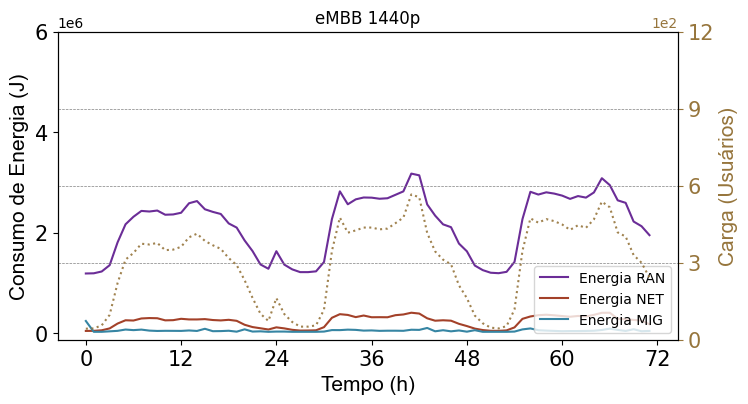

In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_topo = pandas.read_csv(r"solutions\1440p\topo_50.csv", sep=',')

fig, ax1 = plt.subplots(figsize=(8, 4))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.9
ax1.set_ylabel('Consumo de Energia (J)', fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')

ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)

ax1.plot(df_topo['timestamp'][:72], df_topo['ranEnergy'][:72], color=color2, label='Energia RAN')
ax1.plot(df_topo['timestamp'][:72], df_topo['netEnergy'][:72], color=color3, label='Energia NET')
ax1.plot(df_topo['timestamp'][:72], df_topo['migEnergy'][:72], color=color4, label='Energia MIG')

plt.yticks([0, 2000000, 4000000, 6000000])
plt.xticks(range(0, 194, 12))
# plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.legend(loc='lower right')

# ------------
# SCATTER PLOT
# ------------

df = pandas.read_csv("data/T2_50_BS_usage.csv", sep=',')
ax2 = ax1.twinx()
ax2.set_ylabel('Carga (Usuários)', color=color1, fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors=color1, labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

line, = ax2.plot(df_topo['timestamp'][:72], df.sum(axis=1)[:72], color=color1, alpha=alpha, label='Devices', linestyle=':')

plt.yticks([0, 300, 600, 900, 1200])
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
plt.title("eMBB 1440p")

# plt.show()
# plt.savefig('energy_consumption.pdf', bbox_inches='tight')

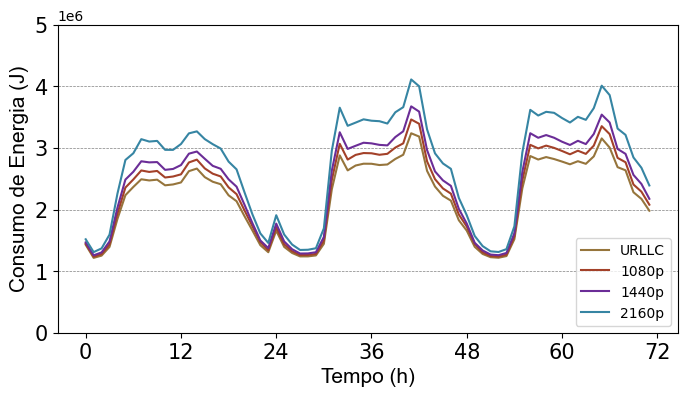

In [22]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_urllc = pandas.read_csv("solutions/topo_50_urllc", sep=',')
df_1080p = pandas.read_csv("solutions/topo_50_1080p", sep=',')
df_1440p = pandas.read_csv("solutions/topo_50_1440p", sep=',')
df_2160p = pandas.read_csv("solutions/topo_50_2160p", sep=',')

fig, ax1 = plt.subplots(figsize=(8, 4))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.9
ax1.set_ylabel('Consumo de Energia (J)', fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)

df_urllc['energy'] = df_urllc['ranEnergy'] + df_urllc['migEnergy'] + df_urllc['netEnergy']
df_1080p['energy'] = df_1080p['ranEnergy'] + df_1080p['migEnergy'] + df_1080p['netEnergy']
df_1440p['energy'] = df_1440p['ranEnergy'] + df_1440p['migEnergy'] + df_1440p['netEnergy']
df_2160p['energy'] = df_2160p['ranEnergy'] + df_2160p['migEnergy'] + df_2160p['netEnergy']

ax1.plot(df_urllc['timestamp'][:72], df_urllc['energy'][:72], color=color1, label='URLLC')
ax1.plot(df_urllc['timestamp'][:72], df_1080p['energy'][:72], color=color3, label='1080p')
ax1.plot(df_urllc['timestamp'][:72], df_1440p['energy'][:72], color=color2, label='1440p')
ax1.plot(df_urllc['timestamp'][:72], df_2160p['energy'][:72], color=color4, label='2160p')

plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000])
plt.xticks(range(0, 73, 12))
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.legend(loc='lower right')

# plt.show()
plt.savefig('centralization.pdf', bbox_inches='tight')

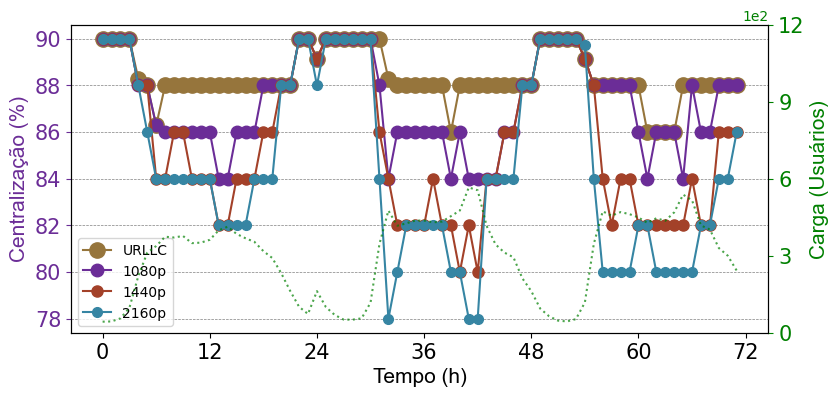

In [54]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_urllc = pandas.read_csv("solutions/topo_50_urllc", sep=',')
df_1080p = pandas.read_csv("solutions/topo_50_1080p", sep=',')
df_1440p = pandas.read_csv("solutions/topo_50_1440p", sep=',')
df_2160p = pandas.read_csv("solutions/topo_50_2160p", sep=',')

fig, ax1 = plt.subplots(figsize=(9, 4))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'

alpha = 0.7
ax1.set_ylabel('Centralização (%)', color=color2, fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=15, colors=color2)
ax1.tick_params(axis='x', which='major', labelsize=15)

ax1.plot(df_urllc['timestamp'][:72], df_urllc['centralization'][:72]/3.5, color=color1, marker='o', ms=11, label='URLLC')
ax1.plot(df_urllc['timestamp'][:72], df_1080p['centralization'][:72]/3.5, color=color2, marker='o', ms=9, label='1080p')
ax1.plot(df_urllc['timestamp'][:72], df_1440p['centralization'][:72]/3.5, color=color3, marker='o', ms=8, label='1440p')
ax1.plot(df_urllc['timestamp'][:72], df_2160p['centralization'][:72]/3.5, color=color4, marker='o', ms=7, label='2160p')

# plt.yticks([92, 93, 94, 95, 96])
plt.xticks(range(0, 74, 12))
plt.legend(loc='lower left')

# ------------
# SCATTER PLOT
# ------------

df = pandas.read_csv("data/T2_50_BS_usage.csv", sep=',')
ax2 = ax1.twinx()
ax2.set_ylabel('Carga (Usuários)', color='green', fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors='green', labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
# ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax2.plot(df_topo['timestamp'][:72], df.sum(axis=1)[:72], color='green', alpha=alpha, linestyle=':')

plt.yticks([0, 300, 600, 900, 1200])
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

# plt.show()
plt.savefig('centralization.pdf', bbox_inches='tight')


In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_calc = pandas.read_csv("solutions/topo_50_2160p", sep=',')
df_hp = pandas.read_csv("solutions/topo_50_2160p", sep=',')
df_hl = pandas.read_csv("solutions/topo_50_2160p", sep=',')

fig, ax1 = plt.subplots(figsize=(8, 4))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.9
ax1.set_ylabel('Consumo de Energia (J)', fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)

df_2160p['energy'] = df_2160p['ranEnergy'] + df_2160p['migEnergy'] + df_2160p['netEnergy']
df_2160p['energy'] = df_2160p['ranEnergy'] + df_2160p['migEnergy'] + df_2160p['netEnergy']
df_2160p['energy'] = df_2160p['ranEnergy'] + df_2160p['migEnergy'] + df_2160p['netEnergy']

ax1.plot(df_urllc['timestamp'][:72], df_2160p['energy'][:72], color=color4, label='2160p')

plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000])
plt.xticks(range(0, 73, 12))
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.legend(loc='lower right')

# plt.show()
plt.savefig('centralization.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'solutions/topo_50_2160p'